Importing the Dependencies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Preprocessing

In [59]:
# loading the dataframe
car_dataset = pd.read_csv('car data.csv.xls')

In [60]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [61]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [62]:
# checking the no of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [63]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [64]:
print(car_dataset.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [65]:
print(car_dataset.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [66]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG': 2}}, inplace = True)
# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)
# encoding "Transmission" Column
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace = True)


/var/folders/74/0x8t7fyn2bb4fb4x3bzglfrm0000gn/T/ipykernel_9005/3905165090.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG': 2}}, inplace = True)
/var/folders/74/0x8t7fyn2bb4fb4x3bzglfrm0000gn/T/ipykernel_9005/3905165090.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)
/var/folders/74/0x8t7fyn2bb4fb4x3bzglfrm0000gn/T/ipykernel_9005/3905165090.py:6: FutureWarning: Downcasting beha

Splitting the Data into Training Data and Testing Data

In [67]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price'] 

In [68]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [69]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the Data and Target

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

Model Training
1. Linear Regression

In [71]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [72]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [73]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [74]:
# R-square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", error_score)

R squared error: 0.8799451660493709


Visualize the actual prices and Predicted prices 

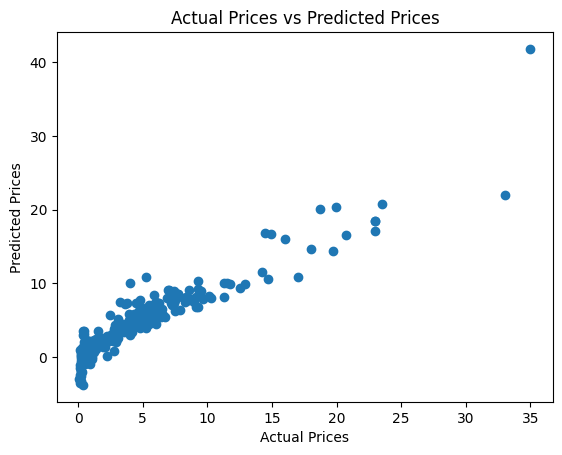

In [75]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [76]:
#prediction on training data
testing_data_prediction = lin_reg_model.predict(X_test)

In [77]:
# R-square error
error_score_xtest = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error:", error_score_xtest)

R squared error: 0.8365766715026551


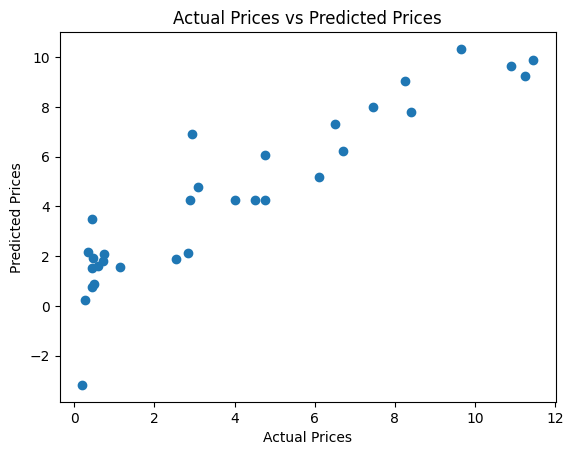

In [78]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [79]:
lasso_reg_model = Lasso()

In [80]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [81]:
#prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [82]:
# R-square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", error_score)

R squared error: 0.8427856123435794


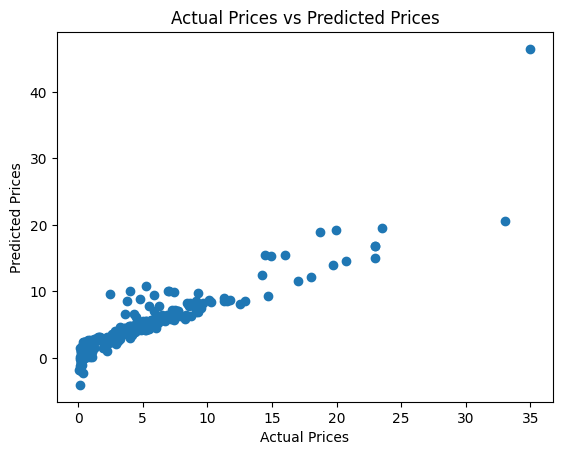

In [83]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [84]:
#prediction on training data
testing_data_prediction = lin_reg_model.predict(X_test)


In [85]:
# R-square error
error_score_xtest = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error:", error_score_xtest)

R squared error: 0.8365766715026551


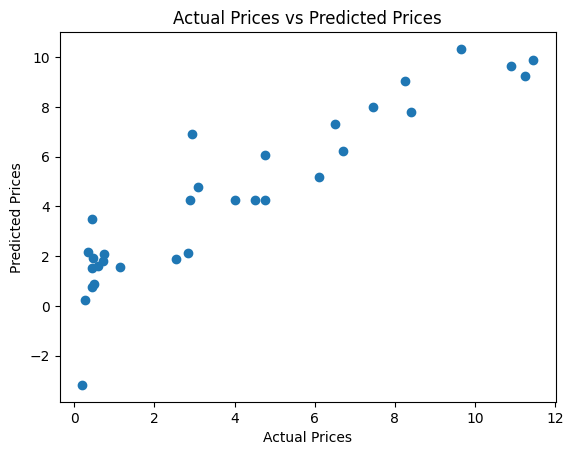

In [86]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()